In [51]:
import numpy as np
import pandas as pd

In [52]:
data = pd.read_excel("preprocessed.xlsx", index_col=0)
data.head(10)

,Age,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,1,1,2,1,1,1,7,4,51552,C++;Python;Git;PostgreSQL,4,0
1,1,1,1,1,1,1,12,5,46482,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,1,1,2,1,1,1,15,6,77290,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,1,1,1,1,1,1,9,6,46135,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,2,1,5,0,1,2,40,30,160932,C++;Python,2,0
5,1,1,2,1,1,1,9,2,38915,JavaScript;Python;Docker;Git;MySQL,5,0
6,2,1,2,1,1,1,26,18,77831,C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Ty...,17,1
7,1,1,2,1,1,2,14,5,81319,C++;Python;Docker;Git,4,0
8,2,1,1,1,1,1,39,21,68507,Python;Git;PostgreSQL,3,0
9,2,1,2,1,1,1,20,16,37752,Delphi;Java;SQL;Docker;Git;PostgreSQL,6,0


In [53]:
label = pd.DataFrame(data["Employed"])
label.head(10)

,Employed
0,0
1,1
2,0
3,0
4,0
5,0
6,1
7,0
8,0
9,0


In [54]:
data.drop(columns=["MainBranch", "YearsCode", "YearsCodePro", "PreviousSalary", "HaveWorkedWith", "ComputerSkills", "Employed"], axis=1, inplace=True)
data.head(10)

,Age,Accessibility,EdLevel,Employment,MentalHealth
0,1,1,2,1,1
1,1,1,1,1,1
2,1,1,2,1,1
3,1,1,1,1,1
4,2,1,5,0,1
5,1,1,2,1,1
6,2,1,2,1,1
7,1,1,2,1,1
8,2,1,1,1,1
9,2,1,2,1,1


In [55]:
col_name = [col for col in data.columns]
print(col_name)

['Age', 'Accessibility', 'EdLevel', 'Employment', 'MentalHealth']


In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [57]:
X = data
Y = label

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [61]:
classifier = DecisionTreeClassifier(max_depth=5)

classifier = classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)

In [62]:
print(f"Accuracy: {metrics.accuracy_score(Y_test, y_pred)}")

Accuracy: 0.5590417205471994


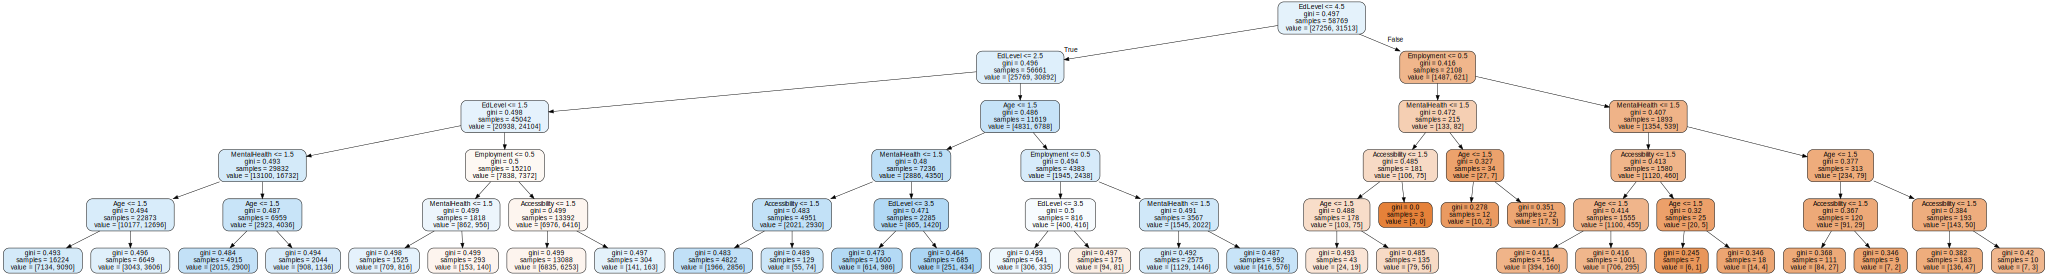

In [64]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=col_name,
                                filled=True, rounded=True)

graph = graphviz.Source(dot_data, format="png")
graph

# Dari data diatas, best split = EdLevel <= 4.5